# Getting data for southern spain

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 18/02/2021*

In this notebook we will grab some data from southern Spain using a python package called `lsdviztools`. 
We also will do a little bit of topographic analysis using **lsdtopotools**.

We are assuming you are on a Notable notebook via the University of Edinburgh's Learn pages. This already has **lsdtopotools** installed. If this is not the case, you will need to use conda to install that yourself. 

## Get the right python packages

In [1]:
!pip install lsdviztools

In [2]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw
import pandas as pd
import geopandas as gpd
import cartopy as cp
import cartopy.crs as ccrs
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

## Now grab some data

First, we need to grab some data. We use a tool in `lsdviztools.lsdbasemaptools` called the `ot_scraper` (`ot` is for opentopography.org).

You can tell this what sort of data you want (most people will use the SRTM 30 metre data) and you also tell it the lower left and the upper right corners, using latitude and longitude. You can get these from goole earth by right clicking on the map and selecting "what's here". In this example below, I will just get a small area near Sorbas. But you might expand your search area. 

In [3]:
# If you want to modify the DEM, change the bounding latitude and longitude. 
Sorbas_DEM = bmt.ot_scraper(source = "SRTM30",longitude_W = -2.3, longitude_E = -2, 
                            latitude_S = 37.1, latitude_N = 37.25,prefix = "Sorbas")
Sorbas_DEM.print_parameters()
Sorbas_DEM.download_pythonic()

The source is: SRTM30
The west longitude is: -2.3
The east longitude is: -2
The south latitude is: 37.25
The north latitude is: 37.1
The path is: ./
The prefix is: Sorbas
I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=37.1&north=37.25&west=-2.3&east=-2&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
Finished downloading


('./Sorbas_SRTM30.tif', './', 'Sorbas_SRTM30.tif')

That just downloaded a .tif file, which you could look at in a GIS. 
You can also look at the raw data here in python using something called `rasterio`. 

But we will use some tools developed at the University of Edinburgh, called **lsdtopotools**, to look at the data. 

To do that, we need to convert the data into a format **lsdtopotools** can understand. 

In [4]:
DataDirectory = "./"
RasterFile = "Sorbas_SRTM30.tif"
gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=30)

The projections is:
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
And some extra projection information strings:
None
WGS 84
The centre of the raster is at:
(-2.224999999976449, 37.09999999999696)
dem_data.width is: 1080
The latitude and longitude is
37.09999999999696 -2.224999999976449
res tuple is:
(30, 30)
The destination CRS is: EPSG:32630
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 893, 'height': 563, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(30.0, 0.0, 562066.7276067039,
       0.0, -30.0, 4123090.0263392134)}
Removing pixels with an elevation less than 0.01


'Sorbas_SRTM30_UTM.tif'

## Now we do some topographic analysis and look at the data

We will extract some topogaphic metrics using `lsdtopotools`. 
This is already installed on the Noteable GeoScience Notebooks.

The `lsdtt_parameters` are the various parametes that you can use to run an analysis. We will discuss these later. For now, we will just follow this recipie. 

In [5]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "60",
                    "print_slope" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "Sorbas_SRTM30_UTM",
                                 write_prefix= "Sorbas_SRTM30_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()


The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Sorbas_SRTM30_UTM
The write prefix is: Sorbas_SRTM30_UTM
The parameter dictionary is:
{'write_hillshade': 'true', 'surface_fitting_radius': '60', 'print_slope': 'true'}


In [6]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


## Plot some data

We are now going to do some simple plots using a mapping package that we put together. There are more general ways to visualise data, but this makes pretty pictures quickly.  

Your colourbar will be located: right
xsize: 893 and y size: 563
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
The EPSGString is: epsg:32630
minimum values are x: 562066.0 and y: 4106200.0
I made the ticks.
x labels are: 
['567', '572', '577', '582', '587']
x locations are:
[567000.0, 572000.0, 577000.0, 582000.0, 587000.0]
y labels are: 
['4111', '4116', '4121']
y locations are:
[4111000.0, 4116000.0, 4121000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 893 and y size: 563
NoData is: -9999.0


findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
The EPSGString is: epsg:32630
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 1.586145648312611
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['', '']
The longest colourbar label has 0 characters.
The cbar characters are: 0 and the cbar text width is: 0.4
cbar_left: 5.449999999999999 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[6.25, 3.6870660694288913]
Map axes are:
[0.136, 0.17629193178539432, 0.72, 0.7694643968960229]
cbar_axes are:
[0.871

<Figure size 432x288 with 0 Axes>

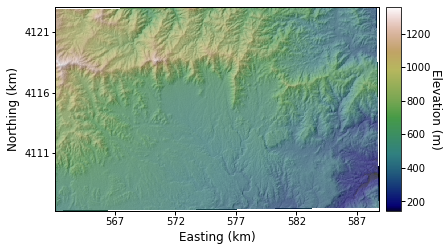

In [7]:
%matplotlib inline
Base_file = "Sorbas_SRTM30_UTM"
DataDirectory = "./"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", 
                                 save_fig=False, size_format="geomorphology")

We can also plot the slope map

Your colourbar will be located: right
xsize: 893 and y size: 563
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 84 / UTM zone 30N
WGS 84 / UTM zone 30N
This seems to be from the new gdal version
Zone string is: 30N
The zone is: 30
And the hemisphere is: N
The EPSG string is: epsg:32630
epsg:32630
The EPSGString is: epsg:32630
minimum values are x: 562066.0 and y: 4106200.0
I made the ticks.
x labels are: 
['567', '572', '577', '582', '587']
x locations are:
[567000.0, 572000.0, 577000.0, 582000.0, 587000.0]
y labels are: 
['4111', '4116', '4121']
y locations are:
[4111000.0, 4116000.0, 4121000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 893 and y size: 563
NoData is: -9999.0
Let me get that projection for you
In this function I will extract the UTM zone
The dataset is projected.
The projection string is: WGS 

<Figure size 432x288 with 0 Axes>

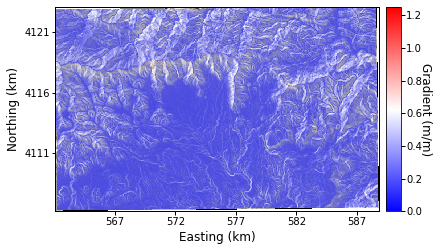

In [8]:
Base_file = "Sorbas_SRTM30_UTM"
Drape_prefix = "Sorbas_SRTM30_UTM_SLOPE"
DataDirectory = "./"
img_name2 = lsdmw.SimpleDrape(DataDirectory,Base_file, Drape_prefix, 
                              cmap = "bwr", cbar_loc = "right", 
                              cbar_label = "Gradient (m/m)",
                              save_fig=False, size_format="geomorphology",
                              colour_min_max = [0,1.25])

## Get some channel profiles

Okay, we will now run a different analysis. We will get some channel profiles. 

In [9]:
lsdtt_parameters = {"print_basin_raster" : "true",
                    "print_chi_data_maps" : "true",
                    "minimum_basin_size_pixels" : "5000"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "Sorbas_SRTM30_UTM",
                                 write_prefix= "Sorbas_SRTM30_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: Sorbas_SRTM30_UTM
The write prefix is: Sorbas_SRTM30_UTM
The parameter dictionary is:
{'print_basin_raster': 'true', 'print_chi_data_maps': 'true', 'minimum_basin_size_pixels': '5000'}


In [10]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


Now we are going to read in the channel data using geopandas

In [11]:
df = pd.read_csv("Sorbas_SRTM30_UTM_chi_data_map.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = "EPSG:4326" 
print(gdf.head())

    latitude  longitude     chi  elevation  flow_distance  drainage_area  \
0  37.222964  -2.137908  2.5363      847.0         4887.7      1139400.0   
1  37.223232  -2.137567  2.4965      847.0         4845.3      1143900.0   
2  37.223229  -2.137229  2.4685      846.0         4815.3      1152900.0   
3  37.223227  -2.136891  2.4405      845.0         4785.3      1155600.0   
4  37.223495  -2.136550  2.4011      844.0         4742.9      1181700.0   

   source_key  basin_key                   geometry  
0           0          0  POINT (-2.13791 37.22296)  
1           0          0  POINT (-2.13757 37.22323)  
2           0          0  POINT (-2.13723 37.22323)  
3           0          0  POINT (-2.13689 37.22323)  
4           0          0  POINT (-2.13655 37.22349)  


In [12]:
bounds = gdf.total_bounds
print(bounds)

[-2.28317052 37.1003536  -2.00073582 37.2498759 ]


We will plot these data on a map using something called cartopy

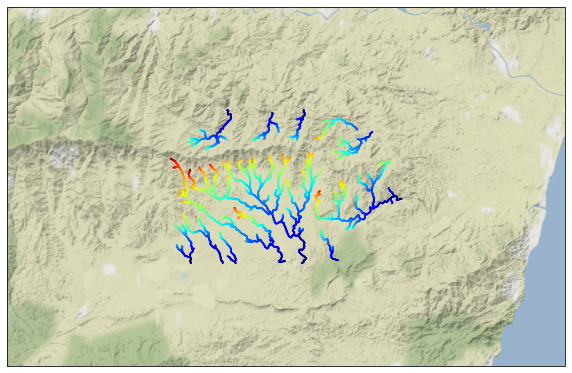

In [13]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
plt.rcParams['figure.figsize'] = [10, 10]

stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure()

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([bounds[0]-0.2, bounds[2]+0.2, bounds[1]-0.1, bounds[3]+0.1], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 11.
ax.add_image(stamen_terrain, 11)

# Add the channel data
gdf = gdf.to_crs(epsg=3857)    # We have to convert the data to the same 
                               #system as the ap tiles. It happens to be this one. 
                               # This epsg code is used for all map tiles (like google maps)

# 
# Isolate a basin        
#gdf_b1 = gdf[(gdf['basin_key'] == 0)]
gdf.plot(ax=ax, markersize=0.5, column='chi', zorder=10,cmap="jet")

Now to plot the channels in profile

<Figure size 720x720 with 0 Axes>

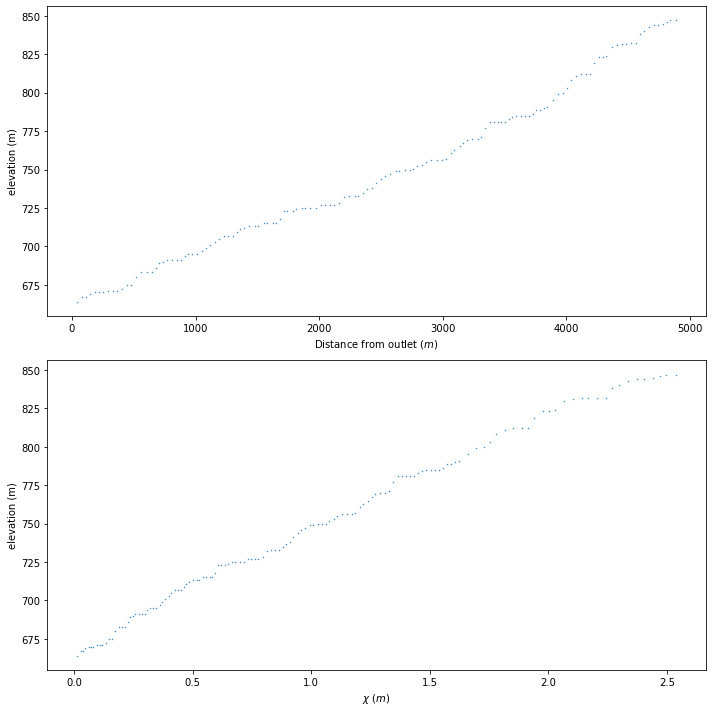

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]

# First lets isolate just one of these basins. There is only basin 0 and 1
gdf_b1 = gdf[(gdf['basin_key'] == 0)]

# The main stem channel is the one with the minimum source key in this basin
min_source = np.amin(gdf_b1.source_key)
gdf_b2 = gdf_b1[(gdf_b1['source_key'] == min_source)]
#gdf_b2 = gdf_b1

# Now make channel profile plots
z = gdf_b2.elevation
x_locs = gdf_b2.flow_distance
chi = gdf_b2.chi

# Create two subplots and unpack the output array immediately
plt.clf()
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x_locs, z,s = 0.2)
ax2.scatter(chi, z,s = 0.2)


ax1.set_xlabel("Distance from outlet ($m$)")
ax1.set_ylabel("elevation (m)")

ax2.set_xlabel("$\chi$ ($m$)")
ax2.set_ylabel("elevation (m)")

plt.tight_layout()